In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier

In [2]:
def print_classification_report(y, y_pred):
    # Crear matriz de confusión
    matriz_confusion = confusion_matrix(y, y_pred)
    matriz_confusion_df = pd.DataFrame(matriz_confusion, 
                                     index=['False', 'True'], 
                                     columns=['False', 'True'])
    print(matriz_confusion_df)
    
    # Calcular métricas
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy}")
    
    precision = precision_score(y, y_pred)
    print(f"Precision: {precision}")
    
    recall = recall_score(y, y_pred)
    print(f"Recall: {recall}")
    
    auc = roc_auc_score(y, y_pred)
    print(f"Area bajo la curva: {auc}")

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

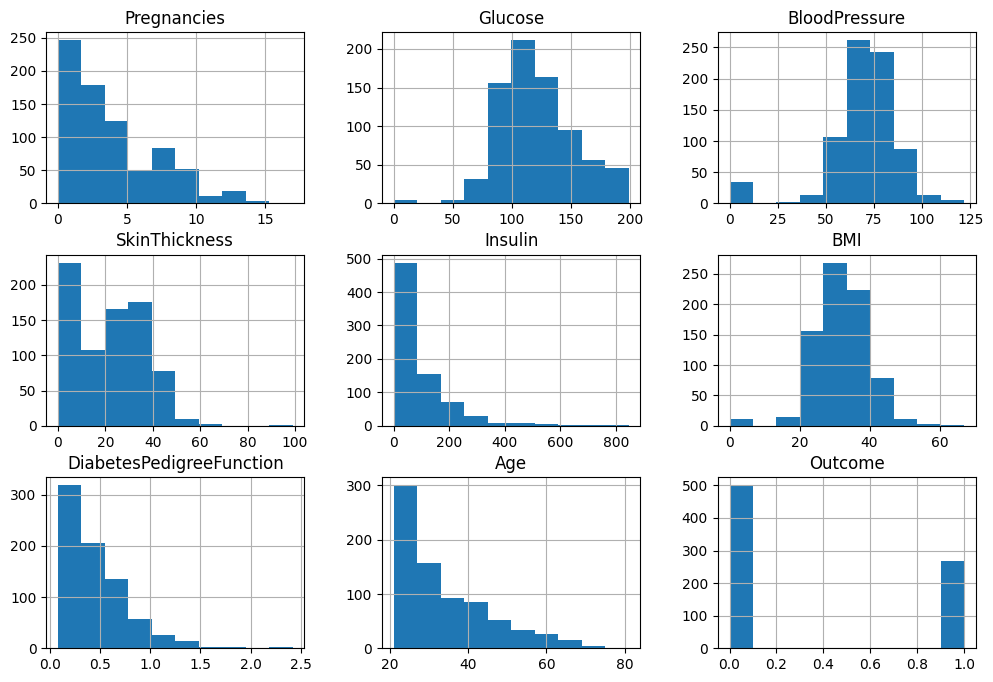

In [6]:
diabetes_df.hist(figsize=(12
                          ,8))


In [7]:
diabetes_df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

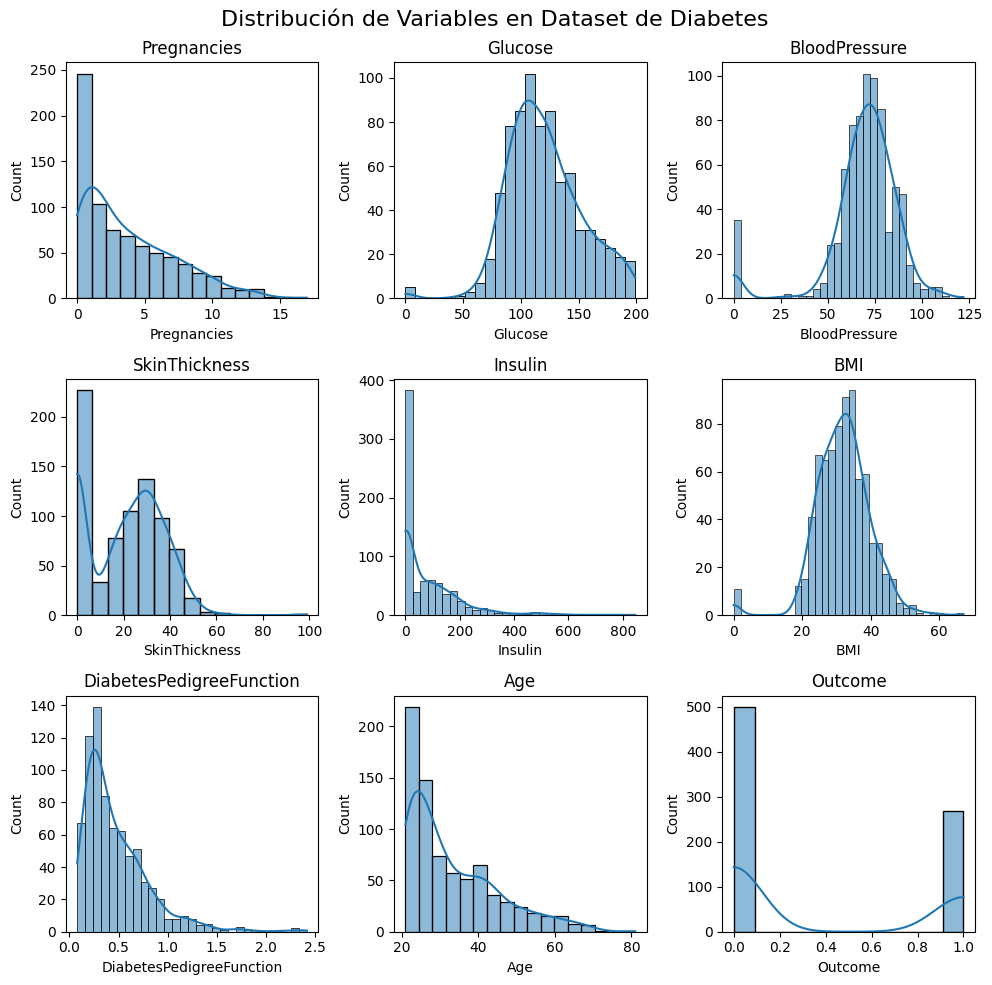


Correlaciones con Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [8]:
# Crear una figura con subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Distribución de Variables en Dataset de Diabetes', fontsize=16)

# Aplanar el array de ejes para facilitar la iteración
axes = axes.ravel()

# Crear histogramas para cada variable
for idx, col in enumerate(diabetes_df.columns):
    sns.histplot(data=diabetes_df, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(col)

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Mostrar las correlaciones con Outcome
correlations = diabetes_df.corr()['Outcome'].sort_values(ascending=False)
print("\nCorrelaciones con Outcome:")
print(correlations)

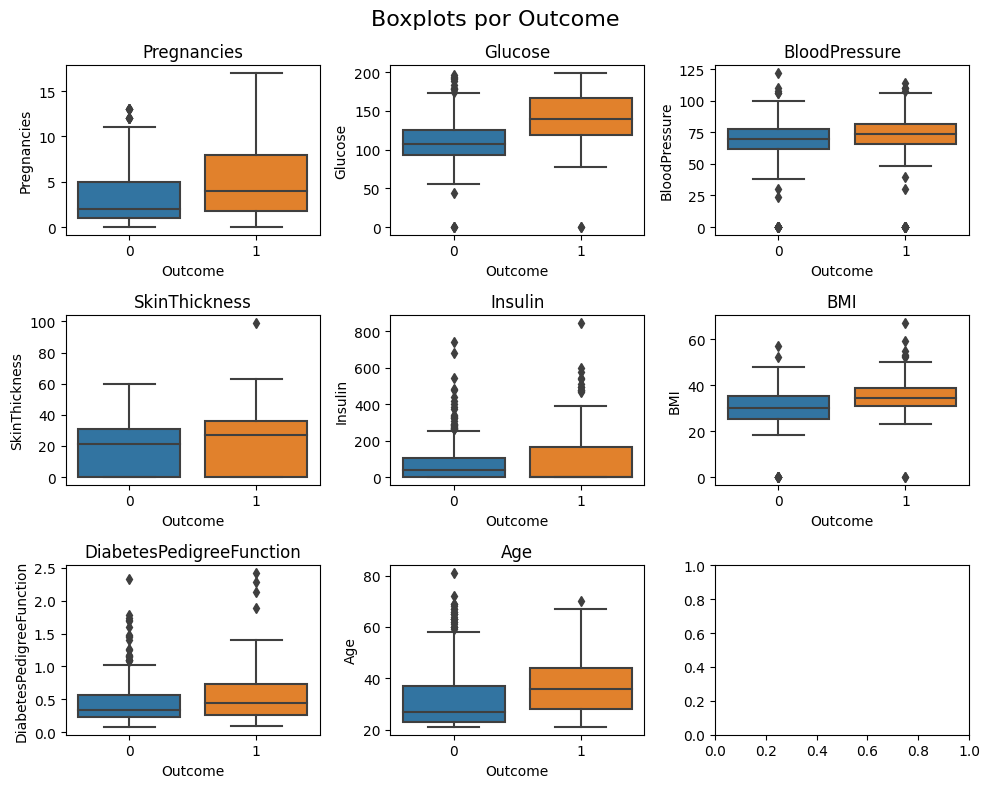

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alternativa: Si quieres ver los boxplots separados por resultado (Outcome)
# Crear una figura con subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle('Boxplots por Outcome', fontsize=16)

# Aplanar el array de ejes
axes = axes.ravel()

# Crear boxplots para cada variable, separados por Outcome
for idx, col in enumerate(diabetes_df.columns[:-1]):  # Excluimos Outcome
    sns.boxplot(data=diabetes_df, y=col, x='Outcome', ax=axes[idx])
    axes[idx].set_title(col)

# Ajustar el diseño
plt.tight_layout()
plt.show()

## Separación de variables independientes y variable dependiente

In [10]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df['Outcome']

In [11]:
from sklearn.model_selection import cross_val_predict

knn = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(knn, X, y, cv=5)
print_classification_report(y, y_pred)


       False  True
False    414    86
True     126   142
Accuracy: 0.7239583333333334
Precision: 0.6228070175438597
Recall: 0.5298507462686567
Area bajo la curva: 0.6789253731343284


### **`Especial cuidado:` importante que no tengan magnitudes diferentes, también muy sensible al desbalanceo de clases.**

### Balanceo de datos

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resmpled, y_resmpled = smote.fit_resample(X, y)
knn = KNeighborsClassifier(weights='distance', n_neighbors=5)
y_pred = cross_val_predict(knn, X_resmpled, y_resmpled, cv=5)
print_classification_report(y_resmpled, y_pred)

       False  True
False    334   166
True      54   446
Accuracy: 0.78
Precision: 0.7287581699346405
Recall: 0.892
Area bajo la curva: 0.7799999999999999


### Estandarización de datos

StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_scaled = StandardScaler().fit_transform(X_resmpled)
knn = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(knn, X_scaled, y_resmpled, cv=5)
print_classification_report(y_resmpled, y_pred)

       False  True
False    365   135
True      70   430
Accuracy: 0.795
Precision: 0.7610619469026548
Recall: 0.86
Area bajo la curva: 0.7949999999999999


MinMaxScaler

In [14]:
X_scaled = MinMaxScaler().fit_transform(X_resmpled)
knn = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(knn, X_scaled, y_resmpled, cv=5)
print_classification_report(y_resmpled, y_pred)

       False  True
False    353   147
True      86   414
Accuracy: 0.767
Precision: 0.7379679144385026
Recall: 0.828
Area bajo la curva: 0.7669999999999999


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_scaled = StandardScaler().fit_transform(X_resmpled)
knn = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(knn, X_scaled, y_resmpled, cv=5)
print_classification_report(y_resmpled, y_pred)

       False  True
False    365   135
True      70   430
Accuracy: 0.795
Precision: 0.7610619469026548
Recall: 0.86
Area bajo la curva: 0.7949999999999999


In [16]:
# Evaluar diferentes valores de k
error_rates = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    y_pred = cross_val_predict(knn, X_scaled, y_resmpled, cv=5)
    error_rates.append(np.mean(y_resmpled != y_pred))
    
# Gradicar el modelo del codo
plt.figure(figsize=(10,5))
plt.plot(range(1,21), error_rates, marker='o'), color='blue', label='k-nearest neighbors')
plt.title('Método del codo para knn', fontsize=20)
plt.xlabel('Número de vecinos', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.legend(loc='best')




SyntaxError: unmatched ')' (1244140652.py, line 10)

### Seleción del k optimo (k elbow)